<a href="https://colab.research.google.com/github/thaohung13/AI_W9_31_3_2023/blob/main/CIFAR_100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.utils import load_img
from keras.utils import img_to_array
from keras.datasets import cifar100
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense
from keras.utils import to_categorical #Onehot encoding convert

import matplotlib.pyplot as plt
from PIL import Image
from pylab import *

In [8]:
# Distribute it to train and test set
(x_train, y_train), (x_val, y_val) = cifar100.load_data()
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)

169001437/169001437 [==============================] - 11s 0us/step
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


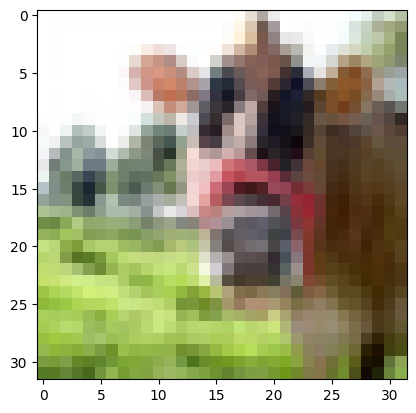

Cái này là: [19]


In [10]:
hinh = x_train[0]
plt.imshow(hinh, cmap = plt.cm.binary)
plt.show()
print("Cái này là:", y_train[0])

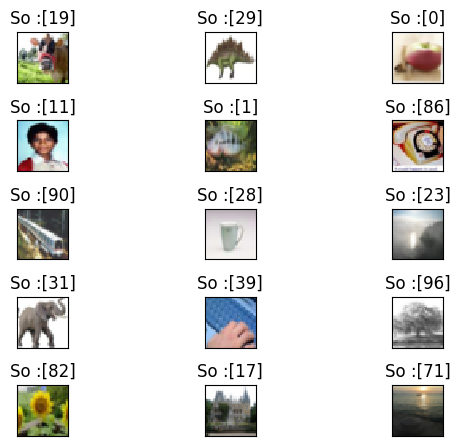

In [14]:

for i in range(15):
  plt.subplot(5,3,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i], cmap= 'gray', interpolation= 'none')
  plt.title("So " ":{}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [31]:
model = Sequential()

model.add(Dense(1024, activation= 'relu',input_shape= (32*32*3,) )) #Gia tri toi uu
model.add(Dense(512, activation= 'relu'))
model.add(Dense(1024, activation= 'relu'))
model.add(Dense(512, activation= 'relu'))
model.add(Dense(1024, activation= 'relu'))
model.add(Dense(512, activation= 'relu'))
model.add(Dense(100, activation= 'softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 1024)              3146752   
                                                                 
 dense_16 (Dense)            (None, 512)               524800    
                                                                 
 dense_17 (Dense)            (None, 1024)              525312    
                                                                 
 dense_18 (Dense)            (None, 512)               524800    
                                                                 
 dense_19 (Dense)            (None, 1024)              525312    
                                                                 
 dense_20 (Dense)            (None, 512)               524800    
                                                                 
 dense_21 (Dense)            (None, 100)              

In [17]:
x_train = x_train.reshape((50000, 32*32*3))
x_train = x_train.astype('float32')/255   

In [18]:
x_val = x_val.reshape((10000, 32*32*3))
x_val = x_val.astype('float32')/255

In [20]:
y_train = to_categorical(y_train, 100)
y_val = to_categorical(y_val, 100)     

In [32]:
model.compile(optimizer= 'rmsprop', loss= 'categorical_crossentropy', metrics= ['accuracy'])
model.fit(x_train, y_train,epochs= 20, batch_size= 256)
test_loss, test_acc = model.evaluate(x_val, y_val)
print('Độ chính xác:', test_acc)
print('Độ mất mát:', test_loss)

Epoch 1/20
196/196 [==============================] - 42s 211ms/step - loss: 4.5419 - accuracy: 0.0213
Epoch 2/20
196/196 [==============================] - 42s 216ms/step - loss: 4.2187 - accuracy: 0.0472
Epoch 3/20
196/196 [==============================] - 42s 214ms/step - loss: 4.0703 - accuracy: 0.0677
Epoch 4/20
196/196 [==============================] - 42s 215ms/step - loss: 3.9686 - accuracy: 0.0848
Epoch 5/20
196/196 [==============================] - 41s 210ms/step - loss: 3.8638 - accuracy: 0.1021
Epoch 6/20
196/196 [==============================] - 41s 210ms/step - loss: 3.7612 - accuracy: 0.1201
Epoch 7/20
196/196 [==============================] - 41s 210ms/step - loss: 3.6586 - accuracy: 0.1367
Epoch 8/20
196/196 [==============================] - 41s 211ms/step - loss: 3.5811 - accuracy: 0.1501
Epoch 9/20
196/196 [==============================] - 41s 211ms/step - loss: 3.5039 - accuracy: 0.1628
Epoch 10/20
196/196 [==============================] - 42s 216ms/step - l

In [33]:
model.save('cifar100.h5')

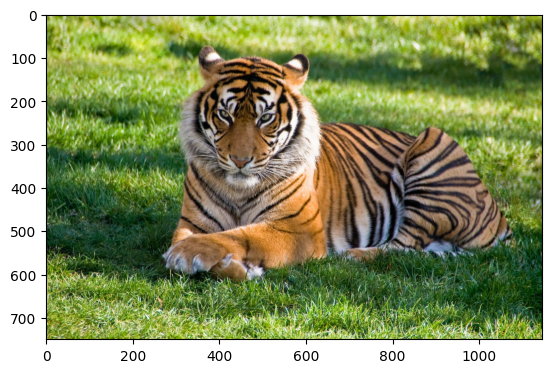

In [34]:
img = Image.open('ho.jpeg')
imshow(img)

In [36]:
img = load_img('ho.jpeg', target_size= (32,32))
img = img_to_array(img)
img = img.reshape((1,32*32*3))
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img), axis= 1)

1/1 [==============================] - 0s 198ms/step


array([77])